In [1]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
from utils import columns, dates,metrics, get_data_pred
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('../data/united_data.csv', index_col=0)
y = df['Corn_Yield']
X = df.drop(columns=['Corn_Yield'], axis=1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [4]:
reg = HistGradientBoostingRegressor().fit(X_train, y_train)

In [5]:
mse = mean_squared_error(y_test, reg.predict(X_test))
mse

227.550426420556

In [6]:
res_y_test = reg.predict(X_test)
reg.score(X,y)

0.9714351117557671

In [8]:
res = reg.predict(get_data_pred('ACAvNTuEuFWcmwms'))
res

array([113.47952751, 100.98963421, 117.33444096, 131.30238429,
       155.8135644 , 112.98965924, 124.56315756, 137.86786347,
       108.70966195, 145.70337341, 130.57576041, 158.57286693,
       111.39063372, 135.36004557, 155.96440226, 117.1800006 ,
       122.06339855])

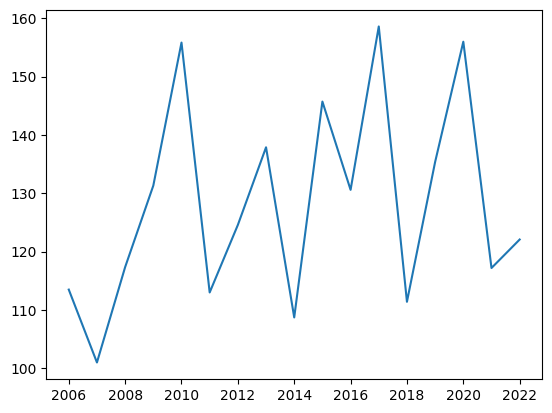

In [9]:
plt.plot( range(2006,2023), res)

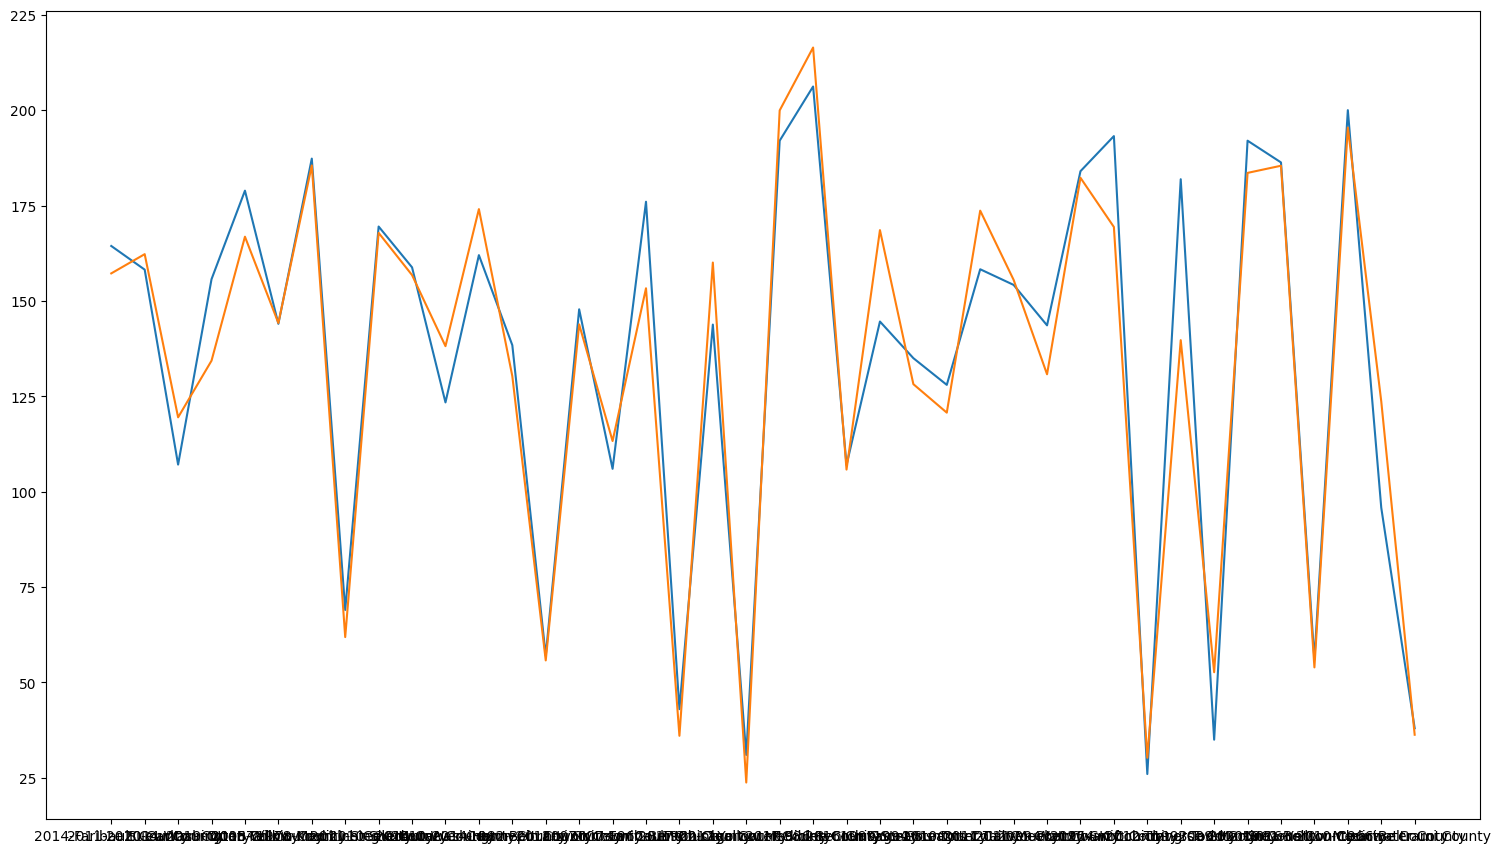

In [10]:
plt.plot(y_test[:40])
plt.plot(res_y_test[:40])
fig = plt.get_current_fig_manager()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)